<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/E4_Py_Stat_Hip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normality Test

By examining the shape of the distribution, you can get an idea of whether the data is normally distributed or skewed. However, for a more formal assessment of normality, statistical tests like the Shapiro-Wilk test or the Kolmogorov-Smirnov test are recommended.

<ipython-input-26-e21b0f3f3e53>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(premiums)


<Axes: ylabel='Density'>

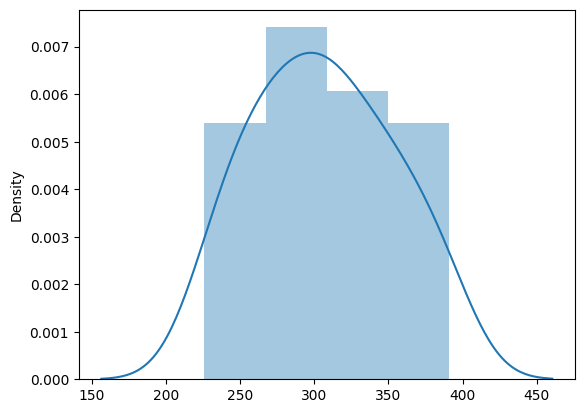

In [26]:
import seaborn as sns
premiums = [333,	320,	301,	280,	270,	251,	260,	255,	355,	345,	355,	345,	366,	352,	331,	308,	297,	276,	286,	281,	391,	380,	391,	380,	300,	288,	271,	252,	243,	226,	234,	230,	320,	311,	320,	311]
sns.distplot(premiums)

In [27]:
from scipy.stats import normaltest
normaltest(premiums)

NormaltestResult(statistic=2.8425253227965745, pvalue=0.24140900654140018)

# Hypothesis Test

## Two-Tailed Test



The company Suco Bom produces fruit juices in 500 ml packages. Its production process is almost entirely automated and the juice packaging is filled by a machine that sometimes presents a certain misadjustment, leading to errors in filling the packaging with more or less content. When the average volume drops below 500 ml, the company worries about losing sales and having problems with regulatory bodies. When the volume exceeds 500 ml, the company begins to worry about losses in the production process.

The quality control sector of the company Suco Bom periodically extracts samples from 50 packages to monitor the production process. For each sample, a hypothesis test is carried out to assess whether the machinery has become out of adjustment. The QA team assumes a 5% significance level.

Suppose now that a sample of 50 packages was selected and that the observed sample mean was 503.24 ml and standard deviation 4.48. Is this sample mean value sufficiently greater than 500 ml to make us reject the hypothesis that the process mean is 500 ml at the 5% significance level?

In [48]:
from scipy.stats import norm
from numpy import sqrt
#Hipotese de ser igual, significa um bicaudal com h0 da medias serem iguais
#ùêª0:ùúá=500
#ùêª1:ùúá‚â†500
u=500
n =50
sig=0.05
z_sig_sob2 = norm.ppf(1-sig+sig/2)
print(z_sig_sob2)
x=503.24
s=4.48
z=(x-u)/(s/sqrt(n))
z

1.959963984540054


5.113897256795581

In [29]:

area=norm.cdf(z)
print(area)
pvalor=2*(1-area)
print(pvalor)
if (pvalor <= sig):
    print('rejeita h0')
else:
    print('aceita h0')

#Rejeitar  ùêª0  se o valor  ùëù‚â§ùõº

0.9999998422104751
3.155790497810784e-07
rejeita h0


In [30]:
from statsmodels.stats.weightstats import ztest
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505,
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505,
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501,
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495,
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]
ztest(x1 = amostra, value = u)


(5.109559775991873, 3.229103172445771e-07)

Conclusion: As the sample mean ùë•¬Ø is significantly greater than 500 ml, we reject ùêª0 . In this case, measures must be taken to adjust the machinery that fills the packages.

## One-tailed Test




A famous soft drink manufacturer claims that a 350 ml can of its flagship product contains a maximum of 37 grams of sugar. This claim leads us to understand that the average amount of sugar in a can of soda should be equal to or less than 37 g. A suspicious consumer with knowledge of statistical inference decides to test the manufacturer's claim and selects, at random, from a set of different establishments, a sample of 25 cans of the soft drink in question. Assuming that this population is distributed approximately as normal and considering a significance level of 5%, is it possible to accept the manufacturer's claim as valid?

In [31]:
from scipy.stats import t as t_student
from numpy import mean, std
#ùêª0:ùúá‚â§37
#ùêª1:ùúá>37
amostra = [37.27, 36.42, 34.84, 34.60, 37.49,
           36.53, 35.49, 36.90, 34.52, 37.30,
           34.99, 36.55, 36.29, 36.06, 37.42,
           34.47, 36.70, 35.86, 36.80, 36.92,
           37.04, 36.39, 37.32, 36.64, 35.45]
n=25
u=37
x=mean(amostra)
s=std(amostra)
sig<-0.05
conf = 1-sig
graus_de_lib = n-1
t_sig = t_student.ppf(conf, graus_de_lib)
print(t_sig)
t = (x - u) / (s / sqrt(n))
t

1.7108820799094275


-3.9568374713288734

In [32]:
pvalor = 1-t_student.cdf(t, df = graus_de_lib)
pvalor
#Rejeitar  ùêª0  se o valor  ùëù‚â§ùõº

0.9997062063779475

In [33]:
from statsmodels.stats.weightstats import DescrStatsW
test = DescrStatsW(amostra)
test.ttest_mean(value = u, alternative = 'larger')

(-3.8768931199520447, 0.9996406170303819, 24.0)

Conclusion: With a 95% confidence level we cannot reject ùêª0, that is, the manufacturer's claim is true.


## Test two samples



In our dataset we have the income of heads of households obtained from the National Household Sample Survey - PNAD in 2015. A well-known problem in our country concerns income inequality, mainly between men and women.

Two random samples, one of 500 men and the other of 500 women, were selected from our dataset. In order to prove this inequality, test the equality of the means between these two samples with a significance level of 1%.

In [56]:
homens = [300, 1000, 4000, 5000, 300, 350, 1200, 1200, 1100, 1800, 700, 5000, 250, 1560, 400, 5500, 3000, 0, 1100, 1500, 500, 500, 788, 500, 3000, 788, 2400, 788, 3300, 1350, 2500, 2000, 1300, 2430, 9000, 10120, 1380, 2000, 1400, 1000, 500, 1500, 2200, 2100, 4000, 1000, 1200, 2900, 1800, 2000, 788, 1576, 800, 2400, 788, 788, 788, 0, 12000, 7880, 850, 1000, 1000, 1600, 3800, 788, 1200, 300, 350, 700, 6000, 1500, 5000, 2000, 1200, 800, 250, 800, 1600, 400, 3000, 2304, 800, 1400, 450, 788, 2200, 6000, 1200, 4000, 6000, 1100, 1200, 1300, 3000, 3000, 1500, 1280, 788, 1400, 788, 4000, 0, 1000, 2500, 1300, 3000, 500, 1600, 2000, 1280, 150, 0, 0, 7000, 1061, 700, 788, 2000, 788, 10500, 788, 1600, 1050, 1100, 3000, 800, 1400, 1200, 2500, 1000, 1500, 1500, 900, 2000, 300, 3000, 788, 1400, 2000, 2000, 3000, 2600, 15000, 1500, 950, 1200, 1500, 7500, 1400, 350, 750, 1200, 788, 0, 2500, 1700, 788, 700, 1600, 1200, 320, 6000, 2000, 2000, 3000, 900, 2100, 0, 788, 1800, 1600, 4000, 1300, 1300, 1500, 8900, 1400, 788, 600, 1000, 950, 2000, 4000, 2300, 2000, 800, 2500, 1500, 1400, 800, 6000, 788, 900, 200, 1300, 788, 2600, 1500, 8000, 900, 2000, 2000, 350, 3000, 9580, 0, 400, 800, 1700, 1800, 1200, 18000, 9000, 3000, 1200, 700, 1200, 400, 987, 6000, 2000, 0, 0, 480, 500, 800, 1680, 10000, 1200, 1700, 788, 2200, 10000, 10000, 100, 1200, 1600, 2500, 1300, 1200, 1300, 2200, 200, 60, 1100, 1200, 6000, 4500, 100, 788, 2900, 2500, 900, 788, 2500, 4000, 788, 1400, 1000, 300, 788, 1000, 4000, 2200, 788, 1000, 1000, 600, 1600, 6000, 2500, 2500, 1000, 3000, 2200, 4500, 1500, 4300, 1500, 8500, 3200, 1200, 1200, 1500, 4000, 2000, 1350, 1500, 890, 5000, 2400, 13000, 800, 1500, 1500, 2000, 580, 500, 920, 1200, 2000, 788, 500, 20000, 1350, 1576, 500, 8000, 1800, 600, 1000, 3000, 4000, 1500, 788, 600, 2300, 1500, 500, 500, 800, 900, 8000, 1600, 3000, 788, 1500, 5200, 900, 3565, 650, 1700, 1600, 788, 1200, 788, 788, 100, 900, 1700, 10000, 1600, 200, 788, 1400, 1500, 400, 4200, 1400, 4000, 5516, 3500, 700, 1400, 1200, 0, 7000, 2000, 5000, 2000, 750, 3000, 2000, 1500, 200, 3000, 1700, 1500, 7000, 1500, 788, 2400, 2500, 1500, 2000, 1500, 2000, 1100, 800, 1800, 480, 3500, 700, 3400, 5000, 5000, 1300, 3000, 2000, 900, 2000, 1000, 1800, 0, 1500, 788, 3500, 875, 5000, 2000, 1300, 1600, 0, 750, 1200, 120, 1800, 1200, 788, 1000, 0, 1400, 2300, 7000, 4000, 5000, 788, 20000, 4000, 0, 1200, 1800, 500, 1000, 788, 1300, 5000, 50, 1700, 2000, 1600, 2000, 1350, 1500, 600, 1700, 780, 2446, 2100, 5000, 1700, 1200, 1000, 788, 4500, 1500, 788, 0, 1580, 1000, 4500, 2400, 788, 1100, 2000, 788, 100, 1200, 1200, 1200, 1000, 2000, 788, 2000, 15000, 600, 0, 1500, 3000, 4000, 900, 810, 600, 1500, 4000, 1200, 5000, 5300, 2500, 800, 0, 1400, 1500, 4000, 1200, 400, 1000, 820, 1000, 1000, 788, 1500, 2500, 1500, 220, 600, 788, 1750, 7000]
mulheres = [788, 1200, 6000, 1000, 788, 1100, 1900, 1577, 900, 950, 1200, 788, 788, 1100, 30, 620, 900, 1000, 1200, 2000, 0, 500, 1200, 1500, 1200, 1120, 788, 788, 2300, 2400, 3000, 788, 4000, 1000, 500, 500, 1700, 200, 6000, 400, 950, 1100, 50, 930, 850, 1100, 3500, 1500, 1200, 900, 1100, 1500, 788, 1000, 788, 4500, 4000, 8000, 3500, 788, 1050, 1000, 1400, 3500, 600, 3000, 500, 930, 2660, 788, 360, 2364, 788, 160, 1100, 1085, 1050, 1500, 100, 0, 788, 250, 1700, 1300, 800, 0, 2000, 820, 910, 300, 2000, 200, 788, 788, 800, 1500, 1300, 1200, 0, 600, 1036, 400, 1100, 788, 400, 1500, 1200, 1800, 1000, 788, 850, 60, 1800, 3500, 600, 200, 500, 200, 1100, 1540, 1100, 900, 800, 500, 200, 1200, 1250, 788, 500, 200, 788, 200, 0, 1800, 2000, 1000, 900, 3000, 700, 1200, 788, 2800, 3300, 400, 0, 850, 1022, 6000, 750, 1000, 3500, 400, 1500, 1000, 800, 0, 980, 2400, 850, 1100, 788, 1100, 788, 1200, 788, 864, 1000, 500, 400, 3000, 1200, 100, 80, 900, 2000, 1250, 1000, 300, 400, 1500, 60, 8000, 1000, 600, 800, 350, 788, 0, 600, 788, 2500, 1300, 800, 8000, 1100, 800, 900, 2000, 0, 800, 1400, 1000, 1200, 788, 3840, 788, 3940, 788, 560, 800, 2000, 600, 2900, 0, 400, 800, 7000, 788, 788, 788, 788, 1250, 1500, 1386, 100, 300, 788, 788, 600, 600, 900, 2800, 788, 350, 900, 0, 150, 788, 788, 1000, 30, 788, 780, 900, 0, 0, 3000, 1800, 2000, 1100, 788, 0, 7500, 1800, 788, 788, 2000, 3000, 180, 2500, 800, 0, 1250, 200, 1100, 0, 1100, 400, 1300, 300, 0, 1312, 600, 200, 4000, 2400, 12000, 2150, 500, 400, 0, 600, 400, 788, 1200, 500, 2000, 1500, 70, 500, 2000, 1000, 100, 500, 2000, 100, 2115, 800, 5800, 2300, 750, 788, 0, 900, 1000, 600, 3000, 5500, 1600, 788, 4000, 0, 1100, 120, 320, 1100, 2500, 200, 800, 3000, 550, 4200, 7000, 720, 0, 2000, 5000, 2000, 788, 500, 788, 7000, 500, 788, 1760, 1200, 3500, 1500, 150, 800, 788, 3000, 400, 788, 1000, 2000, 2500, 0, 788, 5200, 788, 0, 600, 1300, 120, 850, 1576, 788, 2000, 1300, 788, 800, 1800, 655, 1580, 789, 788, 850, 788, 7000, 788, 430, 800, 788, 900, 10000, 1200, 300, 400, 788, 788, 3000, 900, 1300, 1300, 788, 800, 1000, 1890, 0, 788, 900, 4000, 788, 1010, 150, 450, 1700, 890, 1200, 2800, 1000, 788, 788, 700, 600, 800, 880, 6000, 800, 800, 820, 788, 1030, 560, 2100, 6500, 2500, 788, 400, 300, 788, 2300, 1000, 3500, 984, 1576, 420, 1700, 450, 1800, 400, 1500, 1500, 4256, 1200, 890, 1200, 300, 400, 850, 1500, 3800, 1800, 996, 2000, 1000, 788, 1500, 300, 600, 950, 1200, 788, 1200, 1500, 250, 788, 1200, 6000, 300, 789, 1500, 788, 3800, 780, 1200, 1200, 220, 788, 500, 200, 480, 1576, 1576, 1035, 900, 800, 1000, 805, 200, 1200, 2220, 1500, 880, 220, 2000, 788, 150, 0, 13000, 40, 5500, 788, 788, 1000, 400, 2000, 200, 1600]

In [57]:
from numpy import mean, std
xH = mean(homens)
sH = std(homens)
xM = mean(mulheres)
sM = std(mulheres)
print(xH)
print(sH)
print(xM)
print(sM)

2142.608
2545.5014763963504
1357.528
1568.330503821181


In [58]:

#ùúá1‚áí  M√©dia das rendas dos chefes de domic√≠lios do sexo masculino
#ùúá2‚áí  M√©dia das rendas dos chefes de domic√≠lios do sexo feminino
#{ùêª0:ùúá1‚â§ùúá2
#ùêª1:ùúá1>ùúá2
#ou
#{ùêª0:ùúá1‚àíùúá2‚â§0
#ùêª1:ùúá1‚àíùúá2>0
sig = 0.01
conf = 1 - sig
z_sig = norm.ppf(conf)
print(z_sig)
nM = 500
nH = 500
D0 = 0
numerador = (xH - xM) - D0
denominador = sqrt((sH ** 2 / nH) + (sM ** 2 / nM))
z = numerador / denominador
z

2.3263478740408408


5.871494490942365

In [59]:

p_valor = 1-norm.cdf(z)
p_valor
#Rejeitar  ùêª0  se o valor  ùëù‚â§ùõº

2.1594197541219273e-09

In [60]:

from statsmodels.stats.weightstats import CompareMeans
comparador_medias = CompareMeans(DescrStatsW(homens), DescrStatsW(mulheres))
comparador_medias.ztest_ind(alternative='larger', value=0)

(5.865620057764754, 2.2372867859458255e-09)

Conclusion: With a 99% confidence level, we reject ùêª0, that is, we conclude that the average income of male heads of households is higher than the average income of female heads of households. Confirming the allegation of income inequality between the sexes.


## Non-Parametric Tests


### Chi-Square Test (ùúí2)

In [39]:
from scipy.stats import chi
#ùêª0:ùêπùê∂ùê¥ùëÖùê¥=ùêπùê∂ùëÇùëÖùëÇùê¥
#ùêª1:ùêπùê∂ùê¥ùëÖùê¥‚â†ùêπùê∂ùëÇùëÖùëÇùê¥
Fobs =[17, 33]
Fesp =[25, 25]
sig  = 0.05
conf = 1 - sig
k = 2 # N√∫mero de eventos poss√≠veis
graus_de_lib = k - 1
chi_2_sig = chi.ppf(conf, graus_de_lib) ** 2
print(chi_2_sig)
chi_2 = 0
for i in range(0,k,1):
    chi_2=chi_2+(Fobs[i]-Fesp[i])**2/Fesp[i]

chi_2

3.8414588206941245


5.12

In [40]:
from numpy import sqrt
1-chi.cdf(sqrt(chi_2), df=graus_de_lib)
#Rejeitar  ùêª0  se o valor  ùëù‚â§ùõº

0.023651616655355978

In [41]:
from scipy.stats import chisquare
chisquare(f_obs=Fobs, f_exp=Fesp)

Power_divergenceResult(statistic=5.12, pvalue=0.023651616655356)

Conclusion: With a 95% confidence level, we reject the null hypothesis ( ùêª0 ) and conclude that the observed and expected frequencies are discrepant, that is, the coin is not honest and needs to be replaced.



## Paired Test (Wilcoxon Test)

In [42]:
antes= [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49]
depois= [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]


In [43]:
from scipy.stats import wilcoxon
significancia = 0.05
confianca = 1 - significancia
n = 35
wilcoxon(antes, depois)

WilcoxonResult(statistic=22.0, pvalue=3.119930624961853e-08)

Conclusion: We reject the hypothesis that there is no difference between the groups, that is, there is a difference between the average number of cigarettes smoked by patients before and after treatment. And as it is possible to verify through the average number of cigarettes smoked per day before (31.86) and after (11.2) the treatment, we can conclude that the treatment presented a satisfactory result.

# Activities

1) An insurance company specializing in insurance for the ceramic industry has a history of claims related to the rupture of ceramic pieces. For a certain type of piece, the historical average strength is 53 MPa, with a standard deviation of 4 MPa (variance of 16 MPa¬≤). After a change in raw material suppliers, the insurer wants to assess whether the average strength of the pieces has changed. To this end, 15 samples of pieces were collected, obtaining a sample mean of 50 MPa. Considering a significance level of 5%, what is the insurer's conclusion about the change in the strength of the pieces?

In [51]:
from scipy.stats import t
from numpy import sqrt
#Hipotese de ser igual, significa um bicaudal com h0 da medias serem iguais
#ùêª0:ùúá=53
#ùêª1:ùúá‚â†53
u=53
s2=16
s=sqrt(s2)
n=15
sig=0.05
#t_ref = t.ppf(sig/2,df=n-1)
#print(t_ref)
x=50
z=(x-u)/(s/sqrt(n))
print(z)
area=t.cdf(z, df=n-1)
pvalor=2*(area)
print(pvalor)
#rejeita Ho p sig=5%, logo assume-se que sao diferentes

-2.904737509655563
0.011533561073217626


2) An insurance company offers insurance for high-speed internet connections. The company guarantees that the average time to transmit a 10 MB file on its network is 7.4 seconds, with a variance of 1.3 seconds¬≤. After making some improvements to the network infrastructure, the insurance company wants to verify whether there has been a reduction in the average transmission time. To this end, 10 independent tests were carried out, obtaining the following transmission times (in seconds): 6.8, 7.1, 5.9, 7.5, 6.3, 6.9, 7.2, 7.6, 6.6, 6.3. Considering a significance level of 1%, is there sufficient evidence to state that the average transmission time has been reduced?

In [49]:
from statsmodels.stats.weightstats import DescrStatsW
#Hipotese de ser igual, significa um bicaudal com h0 da medias serem iguais
#ùêª0:ùúá>=7.4
#ùêª1:ùúá <7.4
u=7.4
s2=1.3
s=sqrt(s)
n=10
sig=0.01
ams = [6.8, 7.1, 5.9 ,7.5, 6.3 ,6.9, 7.2, 7.6 ,6.6 ,6.3]
n=len(ams)
test = DescrStatsW(ams)
test.ttest_mean(value = u, alternative = 'smaller')
#rejeita H0 p sig=1%, logo aceita-se que baixou realmente

0.9955760735389294
Fail to reject the null hypothesis. There is no evidence that the mean transmission time has decreased.


3) An insurance company specializing in construction insurance is evaluating two types of concrete, X and Y, to determine which one offers greater strength and, consequently, less likelihood of claims. Samples of each type of concrete were collected and strength measurements were taken. The results are presented in the table below. Considering a significance level of 10%, is there sufficient evidence to state that concrete type X is stronger than concrete type Y?

In [53]:
#ùêª0:ùúá1‚àíùúá2‚â§0
#ùêª1:ùúá1‚àíùúá2>0
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW
X= [54, 55, 58, 50, 61]
Y= [51, 54, 55, 52, 53]
comparador_medias = CompareMeans(DescrStatsW(X), DescrStatsW(Y))
comparador_medias.ttest_ind(alternative='larger', value=0)
#Nao se pode rejeita Ho p sig-10%, logo nao se pode dizer que X>Y

(1.3065491598369765, 0.11383696170651378, 8.0)

4) An auto insurance company is testing two new types of fuel additives, A and B, to see if they influence the average fuel consumption of a given car model. Ten tests were carried out with each type of additive, in random order, and the results of the average fuel consumption (in km/l) are presented in the table below. Considering a significance level of 5%, is there sufficient evidence to state that additives A and B have different effects on fuel consumption?

In [55]:
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW
#ùêª0:ùúá1‚àíùúá2=0
#ùêª1:ùúá1‚àíùúá2‚â†0
A=[45, 51 ,50 ,62 ,43 ,42 ,53 ,50 ,48 ,55 ]
B=[ 45, 35 ,43 ,59 ,48 ,45 ,41 ,43 ,49 ,39]
n=len(A)
comparador_medias = CompareMeans(DescrStatsW(A), DescrStatsW(B))
comparador_medias.ttest_ind(alternative='two-sided', value=0)
#nao se pode rejeitar Ho p sig=5%, logo aceita-se que as medias nao sao diferentes com 5% de confianca

(1.8632262296569337, 0.07883053852610394, 18.0)